### Exercice 4, part 2:

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('CrowdstormingDataJuly1st.csv')
print('Number of dyads :',len(data))
data.head()

Number of dyads : 146028


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


Let's begin by removing all NaN values in the data set.

In [13]:
dataClean = data.dropna()
print('Percentage of rows kept :', len(dataClean)/len(data)*100,' %')

Percentage of rows kept : 79.0649738406333  %


As shown in a previous analysis from this [notebook](http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb) it was shown that there is a problem regarding data coming from other leagues than the four of interest. For each player there are his games during his entire career, not only the games in the four leagues where the data comes from.

To keep only the main games, we keep referee-dyad players that are present more than 22 times (if a referee officiated 1 matches in a league, he will be present 22 times or more, as there are 22 players in a match).

In [14]:
refs = dataClean.refNum.value_counts()

#We pick only the lines where the referee was more than 22 times.
goodRefs = refs[refs>21]

dataGood = dataClean[dataClean.refNum.isin(goodRefs.index.values)] 

Now we also see again that the two raters disagree quite often.

In [15]:
print('Number of cases where the two raters agree :',
      (dataGood.rater1 == dataGood.rater2).sum()/len(dataGood)*100, ' %')

Number of cases where the two raters agree : 76.5430075391  %


As wedo want to have something more direct to represent one player, we will comput the average of the two raters to have one rating per player, and add it as a column. We will create another data frame where we will do the modifications.

In [122]:
dataCleanNew = dataClean.copy()
dataCleanNew['mean rating'] = (dataClean.rater1.values + dataClean.rater2.values)/2

#And then we get rid ot the original ratings.
dataCleanNew.drop(['rater1','rater2'],axis=1,inplace=True)

As we will do some agregating afterward we have to extract the mean rating for each player so that we do not loose the information during the aggregation of the groups.

In [123]:
#we get one rating per player
playerRating = dataCleanNew.drop_duplicates(subset=['mean rating','player'])

#And we keep only the name and the rating
playerRating = playerRating[['player','mean rating']]
playerRating.shape

(1417, 2)

Let's try grouping by player. And observing only one player. 

In [124]:
playerGroups = dataCleanNew.groupby('player')
onePlayer = playerGroups.get_group('Jean-Armel Kana-Biyik')
onePlayer.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,mean rating
122,jean-armel-kana-biyik,Jean-Armel Kana-Biyik,Stade Rennes,France,03.07.1989,180.0,78.0,Right Fullback,1,1,...,7,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,0.75
951,jean-armel-kana-biyik,Jean-Armel Kana-Biyik,Stade Rennes,France,03.07.1989,180.0,78.0,Right Fullback,1,0,...,66,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.75
4614,jean-armel-kana-biyik,Jean-Armel Kana-Biyik,Stade Rennes,France,03.07.1989,180.0,78.0,Right Fullback,8,2,...,126,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,0.75
7147,jean-armel-kana-biyik,Jean-Armel Kana-Biyik,Stade Rennes,France,03.07.1989,180.0,78.0,Right Fullback,1,0,...,171,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,0.75
8258,jean-armel-kana-biyik,Jean-Armel Kana-Biyik,Stade Rennes,France,03.07.1989,180.0,78.0,Right Fullback,1,0,...,194,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037,0.75


For each player we have to decide what we do with each variable that is not constant. We decide that we can drop the data that represents interaction between the player and the referee (meanIAT, nIAT etc..).

For the rest of the data we will sum all the information that we have about a player (numbeer of victores, red card etc...

In [125]:
dataCleanNew.drop(['meanIAT','nIAT','seIAT','meanExp','seExp','nExp',
                   'refNum','refCountry'],axis=1,inplace=True)
playerGroups = dataCleanNew.groupby('player')
players = playerGroups.sum()

And we take a look at the final data per player.

In [126]:
players.head()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,mean rating
player,,,,,,,,,,,
Adriano,18576.0,7236.0,373,229,59,85,33,58,1,3,27.00
Adrián,21002.0,8574.0,323,155,73,95,60,19,0,0,17.75
Adrián Colunga,8037.0,3243.0,178,53,43,82,39,22,1,0,11.75
Aduriz,11466.0,4914.0,322,125,82,115,105,68,3,4,15.75
Adán,5890.0,2728.0,44,22,6,16,0,1,0,1,0.00


As we see the rating, height and weight have also been agregated as a sum, and that looses us information.

We will therefore create a dictionary that will allow us to apply a custom aggregation for each column. For height, we use the mean which is equivalent to keeping the same value.

We also assume that the attacking position will be related to the number of goals, so w do not need to keep it. The name could theoretically help us get information, but we would need to apply NLP to gain information and not use naive labels, so we will discard it as well.
 

In [139]:
f = {'height':['mean'],'weight':['mean'],'games':['sum'],'victories':['sum'],'ties':['sum'],
     'defeats':['sum'],'goals':['sum'],'yellowCards':['sum'],
     'yellowReds':['sum'],'redCards':['sum'],'mean rating':['mean']}

Then we can apply this aggregation to our data.

In [140]:
players = playerGroups.agg(f)
#and keep th column name as index
players.columns = players.columns.droplevel(1)
players.head()

,height,victories,weight,redCards,defeats,yellowReds,games,ties,goals,mean rating,yellowCards
player,,,,,,,,,,,
Adriano,172.00000,229,67.000000,3,85,1,373,59,33,0.250000,58
Adrián,184.22807,155,75.210526,0,95,0,323,73,60,0.155702,19
Adrián Colunga,171.00000,53,69.000000,0,82,1,178,43,39,0.250000,22
Aduriz,182.00000,125,78.000000,4,115,3,322,82,105,0.250000,68
Adán,190.00000,22,88.000000,1,16,0,44,6,0,0.000000,1


We have now a dataset only with numbers, but there is still one modification we wish to do. For now our dataset contains a rating value and we want the clustering to look for other information that it will use for clustering. Therefore we will remove it from the dataset and use it as labels to test afterwards if the two clusters effectively contain black and white playes.

We will also tranform the mean rating into a label that we can use for cluster identification. We say that if the rating is smaller than 0.4 we set it a 0 and if it is bigger than 0.4 we set it at 1.

We choose here to use K-Means clustering, with 2 clusters and with initial centers equal to 0.

In [234]:
#Removing the mean rating column and storing it into a new dataframe
playersNorating = players.drop('mean rating',axis=1)

#We will define the function to transform the ratings.

def transform_rating(series):
    if series < 0.4:
        return 0
    else:
        return 1
    
labels = players['mean rating'].apply(transform_rating)

Now we will iteratively add features and do the clustering, and compute the silhouette score.

Furthermore to find if the players have been classified in two groups corresponding to their skin type we will use metrics.accuracy_score. We will have clusters corresponding to skin if the score is very low or very high because we don't know for which skin type the 0 and 1 corresponds to. If they are opposed to what we used then a 0.1 accuracy score would mean that 90% of players are in the right cluster which is also good.

In [235]:
silScore = []
accuracy = []

for i in range(1,players.shape[1]):
    cluster = KMeans(n_clusters=2,random_state=0).fit(playersNorating.values[:,0:i])
    sil = metrics.silhouette_score(playersNorating.values,cluster.labels_)
    silScore.append(sil)
    accuracy.append(metrics.accuracy_score(labels,cluster.labels_))

And we take a look at the different silouhette scores. For a recall a score of 1 means that the clusters are well separated, a score of -1 means that they are not well separated.

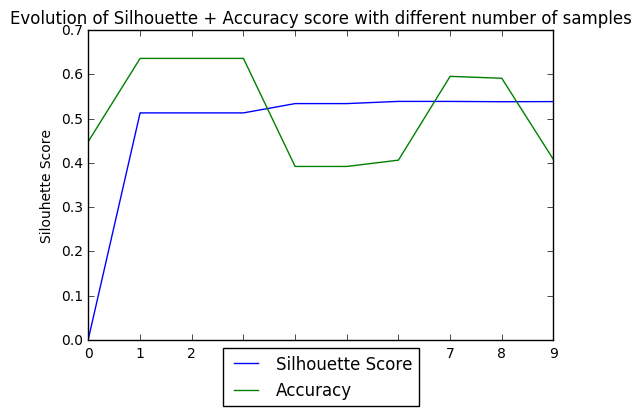

In [244]:
plt.plot(silScore,label='Silhouette Score')
plt.plot(accuracy,label='Accuracy')
plt.title('Evolution of Silhouette + Accuracy score with different number of samples')
plt.xlabel('Number of features')
plt.ylabel('Silouhette Score')
plt.legend(loc=9, bbox_to_anchor=(0.5,0))

We can clearly see that we get the best silhouette score by using all of the features. But at the same time we see that the clusters do not contain players with dark and light skin color as the accuracy is not very high

We have also no tested for diffe combinations of removing columns, we will try again by looping through the colums and adding one at a time.

In [240]:
otherSilscore = []
otherAcc = []

for i in range (1,players.shape[1]-1):
    for j in range(i+1,players.shape[1]):
          cluster = KMeans(n_clusters=2,random_state=0)\
            .fit(playersNorating[playersNorating.columns[i:j]].values)
          sil = metrics.silhouette_score\
          (playersNorating[playersNorating.columns[i:j]].values,cluster.labels_)
          otherSilscore.append(sil)
          if sil > 0.7:
                print(playersNorating.columns[i:j])
        
          otherAcc.append(metrics.accuracy_score(labels,cluster.labels_))
                                                                           

Index(['redCards'], dtype='object')
Index(['yellowReds'], dtype='object')
Index(['goals'], dtype='object')


And we take a look again at the silhouette score for different combinations.

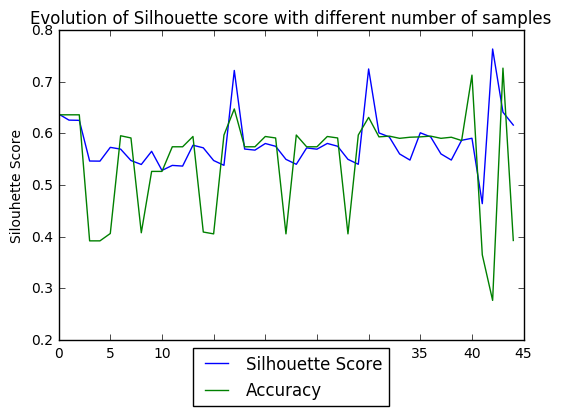

In [243]:
plt.plot(otherSilscore,label='Silhouette Score')
plt.plot(otherAcc,label='Accuracy')
plt.title('Evolution of Silhouette score with different number of samples')
plt.xlabel('Combination')
plt.ylabel('Silouhette Score')
plt.legend(loc=9, bbox_to_anchor=(0.5,0))

We directly see that we have three combinations that have a definitely better. We ran the computations and againg and we found that it was the case when the red cards yellow cards or goals where used as clusters.

But at the same time we see that the accuracy score is not high or low at times where silhouette score is high. Therefore we conclude that our method did not find clusters containing players of different skin colors.

#### Explanations for red card cluster

We have an explanation for the fact that we have good clustering for red cards. In fact as we will show below, red cards are very rare in the data, therefore if use use onl the red cards the algorithm will easily pick up two distinct cluster.

In [26]:
print('Number of red cards :',dataGood.redCards.value_counts())
print('Percentage of players without red cards :',
      dataGood.redCards.value_counts()[0]/dataGood.redCards.value_counts().sum()*100)
print('Red card due to two yellow cards :',dataGood.yellowReds.value_counts())

Number of red cards : 0    102359
1      1344
2        23
Name: redCards, dtype: int64
Percentage of players without red cards : 98.682104776
Red card due to two yellow cards : 0    102400
1      1307
2        16
3         3
Name: yellowReds, dtype: int64


#### Explanation for the yellow card cluster

For the yellow card cluster we can  also see that most players have 0 yellow cards, and we can guess why the algorithm also found two distinct clusters.

In [35]:
dataGood.yellowCards.value_counts()

0     74032
1     21034
2      5240
3      1969
4       794
5       364
6       153
7        83
8        32
9        13
10        8
14        1
13        1
12        1
11        1
Name: yellowCards, dtype: int64

And we also see the same behaviour for goals.

In [36]:
dataGood.goals.value_counts()

0     81280
1     14488
2      4462
3      1658
4       781
5       421
6       218
7       147
8        97
9        57
11       29
10       25
12       21
13       10
14       10
15        4
16        4
18        4
21        3
23        3
17        2
20        2
Name: goals, dtype: int64

We conclude that we understand why our algorithms gave us clusters not representing player skin color but player type, an offensive player will score more goals and a defensive player will score less goals and will be more punished due to making mistakes (red and yellow cards).

In [229]:
clust = KMeans(n_clusters=2,random_state=0).fit(playersNorating[playersNorating.columns[8:9]].values)
metrics.silhouette_score(playersNorating[playersNorating.columns[8:9]],clust.labels_)

0.76321123072525321

In [217]:
players.columns

Index(['height', 'victories', 'weight', 'redCards', 'defeats', 'yellowReds',
       'games', 'ties', 'goals', 'mean rating', 'yellowCards'],
      dtype='object')

In [228]:
playersNorating[playersNorating.columns[8:9]].values

array([[33],
       [60],
       [39],
       ..., 
       [31],
       [ 0],
       [23]])

In [163]:
metrics.silhouette_score(players.values,clusters.labels_)

0.53833933490108354